In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Unemployment in India.csv to Unemployment in India.csv


In [ ]:
pip install pandas matplotlib seaborn


In [ ]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 💾 Load the dataset
df = pd.read_csv('Unemployment in India.csv')

# 👁 Preview first few rows
print("✅ Raw Data Preview:\n", df.head())
print("\n✅ Column Names:", list(df.columns))

✅ Raw Data Preview:
            Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

✅ Column Names: ['Region', ' Date', ' Frequency', ' Estimat

In [ ]:
# 🧹 Clean and prepare data
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

<ipython-input-7-93039488973e>:6: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
# Drop rows with null values in important columns
df.dropna(subset=['Date', 'Estimated Unemployment Rate (%)'], inplace=True)

In [ ]:
# Rename columns for easier use
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

In [ ]:
# ✅ Confirm cleanup
print("\n✅ Cleaned Data Sample:\n", df[['Region', 'Date', 'Unemployment_Rate', 'Area']].head())


✅ Cleaned Data Sample:
            Region       Date  Unemployment_Rate   Area
0  Andhra Pradesh 2019-05-31               3.65  Rural
1  Andhra Pradesh 2019-06-30               3.05  Rural
2  Andhra Pradesh 2019-07-31               3.75  Rural
3  Andhra Pradesh 2019-08-31               3.32  Rural
4  Andhra Pradesh 2019-09-30               5.17  Rural


<ipython-input-14-994e0040cbb7>:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


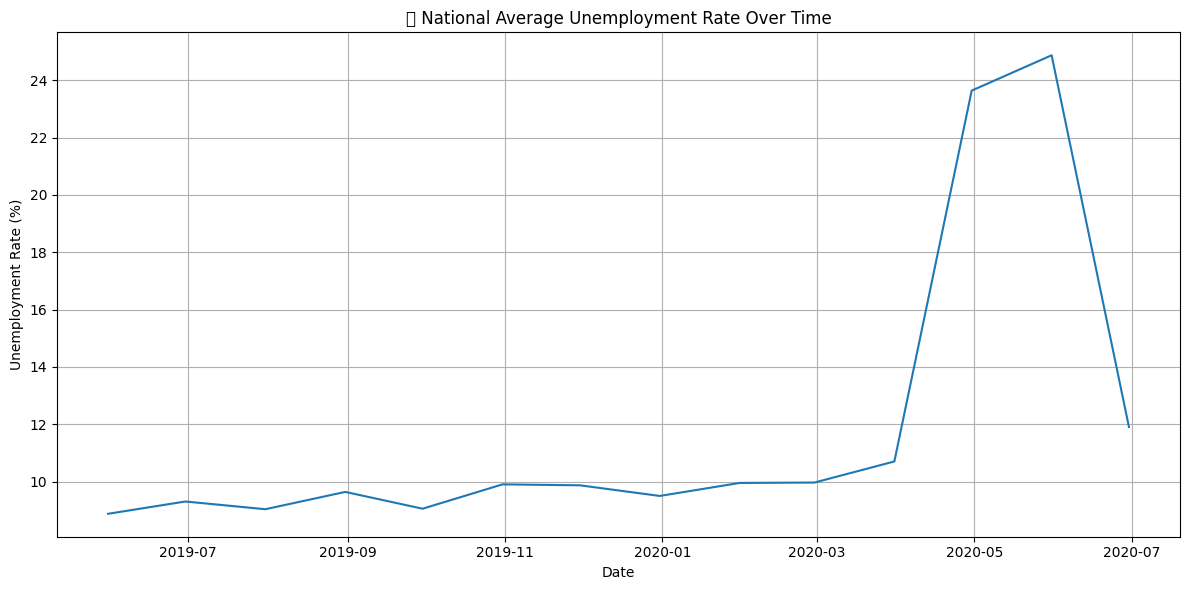

In [ ]:
# 📈 Plot 1: National average unemployment over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=df, estimator='mean', errorbar=None)
plt.title('📊 National Average Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-16-cef317e87438>:8: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


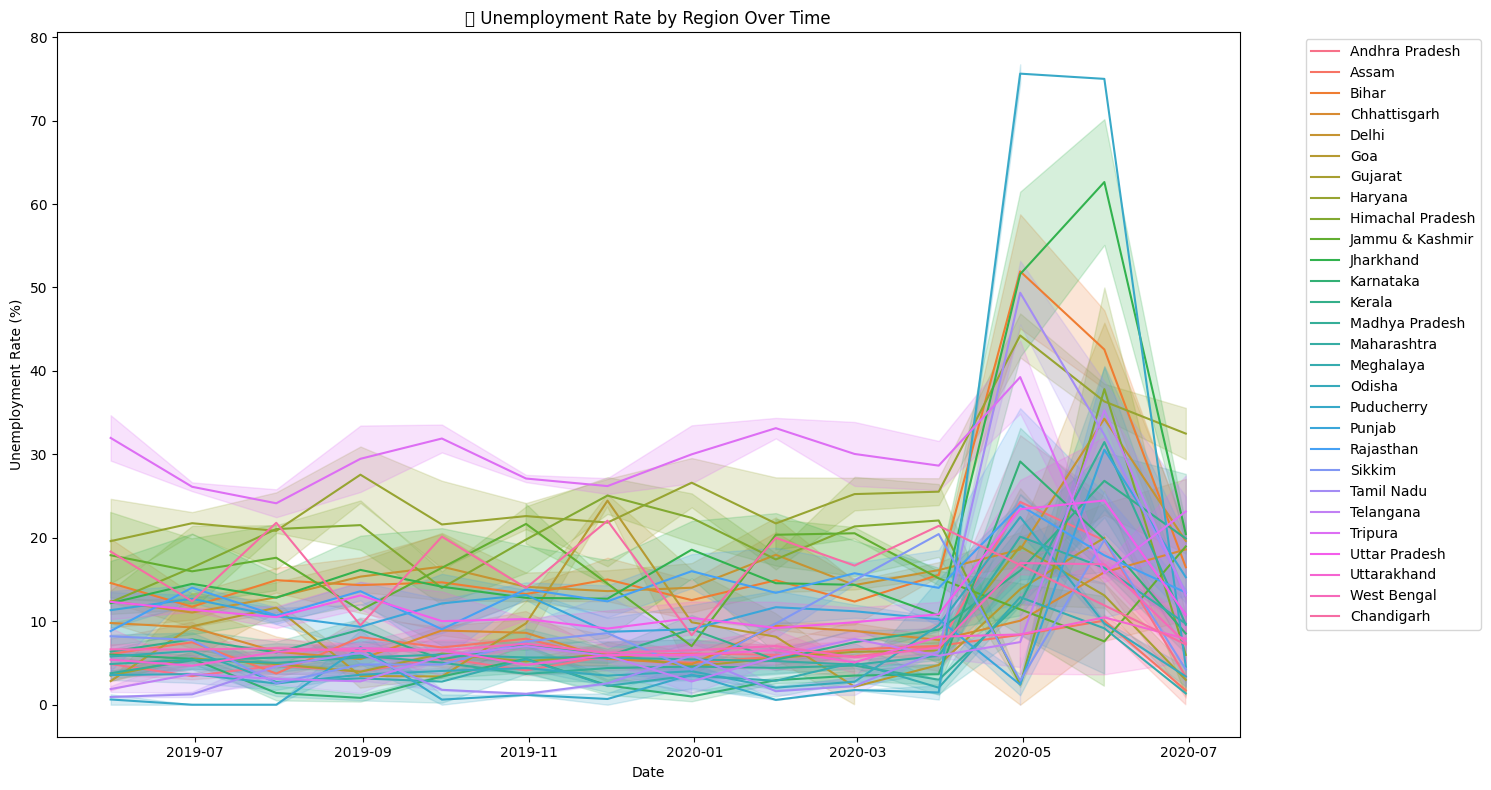

In [ ]:
# 📍 Plot 2: Region-wise unemployment trend
plt.figure(figsize=(15, 8))
sns.lineplot(x='Date', y='Unemployment_Rate', hue='Region', data=df)
plt.title('📍 Unemployment Rate by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

DataFrame columns: Index(['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labour_Participation_Rate', 'Area'],
      dtype='object')


<ipython-input-21-1e91fe61da3a>:8: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


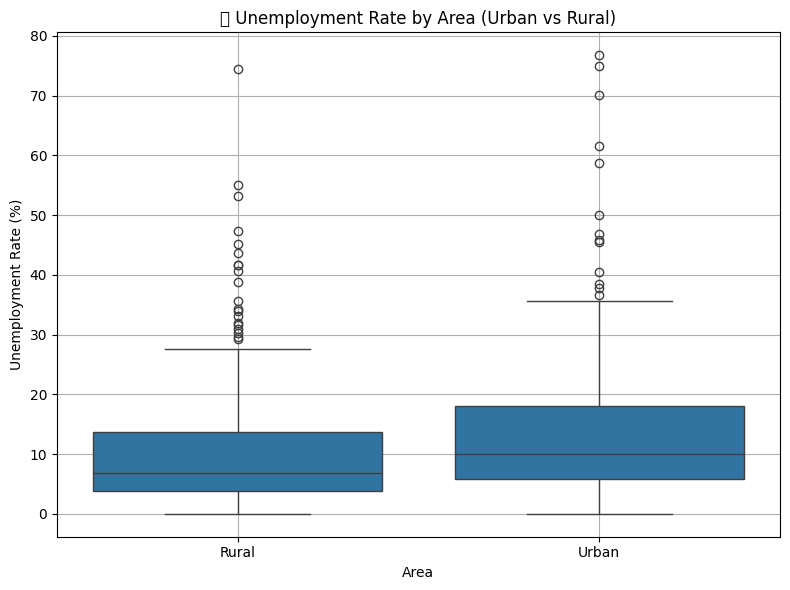

In [ ]:
# 🏙️ Plot 3: Unemployment by Area Type (Urban/Rural)
print("DataFrame columns:", df.columns) # Add this line to check column names
plt.figure(figsize=(8, 6))
sns.boxplot(x='Area', y='Unemployment_Rate', data=df)
plt.title('🏙️ Unemployment Rate by Area (Urban vs Rural)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-22-9c9f37d5e882>:6: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


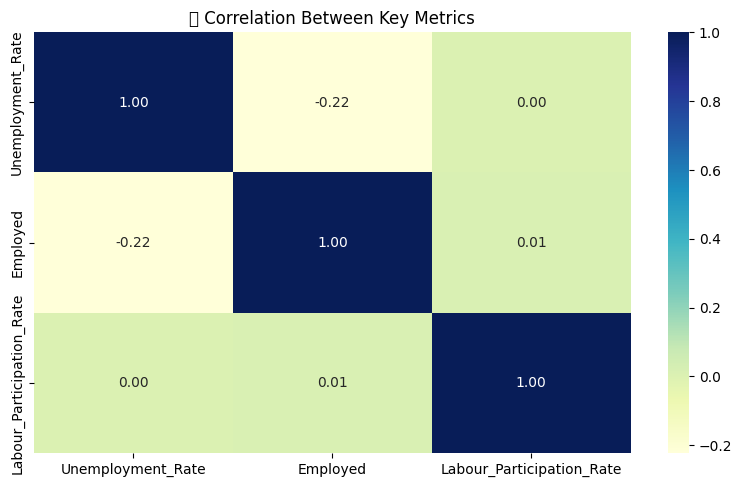

In [ ]:
# 🔗 Plot 4: Correlation Heatmap
plt.figure(figsize=(8, 5))
corr = df[['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('🔗 Correlation Between Key Metrics')
plt.tight_layout()
plt.show()

In [ ]:
# 📋 Summary stats
print("\n📋 Statistical Summary:\n")
print(df[['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']].describe())


📋 Statistical Summary:

       Unemployment_Rate      Employed  Labour_Participation_Rate
count         740.000000  7.400000e+02                 740.000000
mean           11.787946  7.204460e+06                  42.630122
std            10.721298  8.087988e+06                   8.111094
min             0.000000  4.942000e+04                  13.330000
25%             4.657500  1.190404e+06                  38.062500
50%             8.350000  4.744178e+06                  41.160000
75%            15.887500  1.127549e+07                  45.505000
max            76.740000  4.577751e+07                  72.570000


In [ ]:
#Region(s) and Date(s) with Highest Unemployment Rate
max_rate = df['Unemployment_Rate'].max()

highest_unemp = df[df['Unemployment_Rate'] == max_rate][['Region', 'Date', 'Unemployment_Rate', 'Area']]

print(f"\n🔍 Highest Unemployment Rate: {max_rate}%")
print("📍 Region(s) with Highest Unemployment Rate:")
print(highest_unemp)


🔍 Highest Unemployment Rate: 76.74%
📍 Region(s) with Highest Unemployment Rate:
         Region       Date  Unemployment_Rate   Area
627  Puducherry 2020-04-30              76.74  Urban
